Sklonujmy sobie najpierw repozytorium z danymi

In [81]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


!ls ML-datasets 

# Budowa modelu na danych rzeczywistych

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes # zwraca 0/1
    classes = dataset.pop(class_column).unique() # przy wyswietlaniu pokaze kazda kategorie raz
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

Skorzystamy ze zbioru diabetes

In [83]:
X, y, classes = prepare_dataset('diabetes')

In [84]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [85]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int8

In [86]:
y.value_counts()

0    500
1    268
Name: class, dtype: int64

Podejrzyjmy co to za zbór

In [87]:
classes

array(['positive', 'negative'], dtype=object)

In [88]:
X.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [89]:
X.isna().sum() # czy są jakieś nuny

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
dtype: int64

Dzielimy dataset na zbiory treningowy i testowy

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)
# stratify = y, po rownoej ilosci class w train i test

In [91]:
print(y_train.value_counts())
print(y_test.value_counts())

0    375
1    201
Name: class, dtype: int64
0    125
1     67
Name: class, dtype: int64


Trenujemy model na danych treningowych

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=30, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=30)

In [93]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

Stwórzmy następnie macierz pomyłek i wyliczmy miary jakości klasyfikacji

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

In [95]:
cm

array([[107,  18],
       [ 30,  37]], dtype=int64)

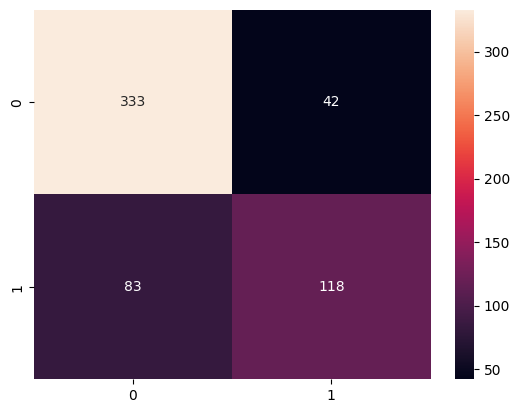

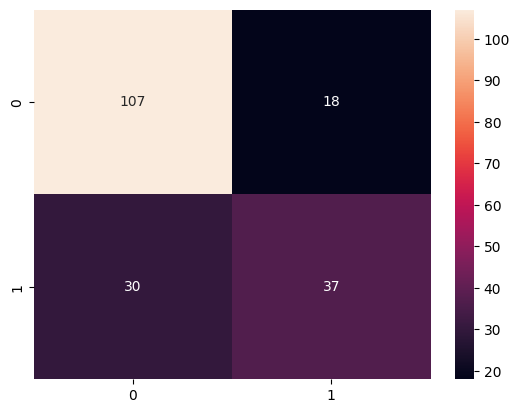

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

Sprawdzenie czy model jest przetrenowany:

In [97]:
from sklearn.metrics import f1_score
print(f'F-Score train: {f1_score(y_train, y_pred_train)}, F-Score test: {f1_score(y_test, y_pred)}')

# wyższe wyniki na treningowym niż testowym - model przetrenowany

F-Score train: 0.6537396121883656, F-Score test: 0.6065573770491803


Możemy też obliczyć wartości pozostałych metryk klasyfikacji korzystając z wbudowanych funkcji.

In [98]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

In [99]:
df_dict = {'train':[accuracy_train, precision_train, recall_train, f1_train],
          'test': [accuracy_test, precision_test, recall_test, f1_test]}

df = pd.DataFrame\
.from_dict(df_dict,
           orient = 'index',
           columns = ['accuracy', 'precision', 'recall', 'f-score'])\
.reset_index()\
.melt(id_vars = 'index', var_name = 'metric')

In [100]:
df

,index,metric,value
0,train,accuracy,0.782986
1,test,accuracy,0.750000
2,train,precision,0.737500
3,test,precision,0.672727
4,train,recall,0.587065
5,test,recall,0.552239
6,train,f-score,0.653740
7,test,f-score,0.606557


Możemy jeszcze spróbować wyświetlić to w formie wykresu.

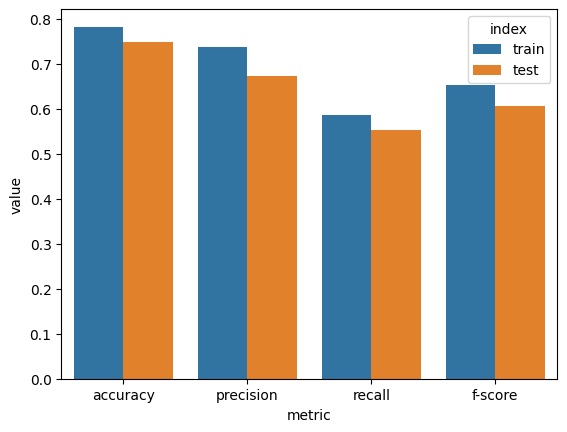

In [101]:
sns.barplot(x='metric', y = 'value', hue = 'index', data =df); 
# srednik usuwa napisy przed wykresem

Możemy też regresję logistyczną zastosować dla zbiorów o wielu etykietach. Stosujemy wówczas strategię One versus Rest (trenujemy tyle klasyfikatorów, ile mamy klas) - sklearn robi to automatycznie.

In [102]:
X, y, classes = prepare_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=30)

In [103]:
y.value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [104]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [105]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

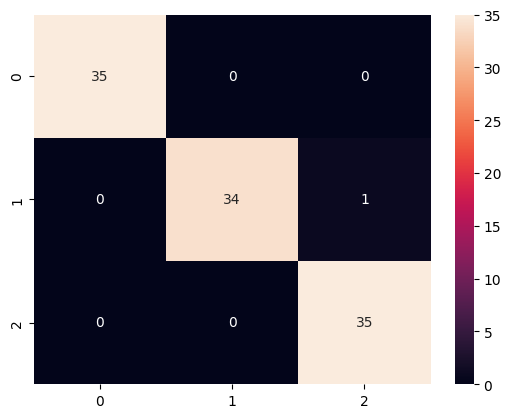

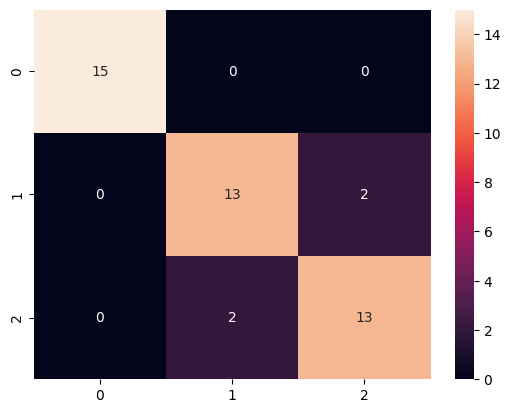

In [107]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [108]:
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [109]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train, average='macro')
recall_test = recall_score(y_test, y_pred, average='macro')

precision_train = precision_score(y_train, y_pred_train, average='macro')
precision_test = precision_score(y_test, y_pred, average='macro')

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

In [110]:
df_dict = {'train':[accuracy_train, precision_train, recall_train, f1_train],
          'test': [accuracy_test, precision_test, recall_test, f1_test]}

df = pd.DataFrame\
.from_dict(df_dict,
           orient = 'index',
           columns = ['accuracy', 'precision', 'recall', 'f-score'])\
.reset_index()\
.melt(id_vars = 'index', var_name = 'metric')

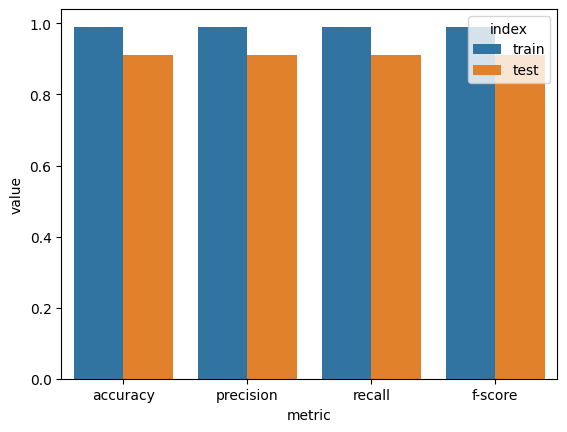

In [111]:
sns.barplot(x='metric', y = 'value', hue = 'index', data =df);

**Zadanie:**

Dla zbioru danych diabets wytrenuj model regresji logistycznej i narysuj krzywą ROC. Zwróć uwagę na różnice w funkcjach:
* predict()
* predict_proba()

Patrząc na krzywą ROC zastanów się czy model jest dobrze wytrenowany, przetrenowany czy wytrenowany niewystarczająco dobrze.

In [112]:
X,y,classes = prepare_dataset('diabetes')

In [113]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [114]:
y.value_counts()

0    500
1    268
Name: class, dtype: int64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=30)

In [123]:
model = LogisticRegression(random_state=30, max_iter = 500)
# domyślnie 100 iteracji, jeśli warrning, to model wie, że krzywa kosztów jeszcze nie osiągneła 0
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=30)

In [129]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [130]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba_train = model.predict_proba(X_train)

In [128]:
# predict_proba() is used to predict the class probabilities (1,0)
# W przypadku modeli, które oferują logikę, wg. któtej wynik może być interpretowany jako prawdopodobieństwo, 
# możemy użyć funkcji preict_proba(). Wynikiem będzie tutaj macierz, w lewej kolumnie będzie zawierała prawdopodobieństwo, 
# że próbka jest klasą 0, w prawej, że jest klasą 1.

In [131]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:,1], drop_intermediate=False)
# roc_curve(y_test, y_pred_proba[:,1] - prawdopodobientwo bycia 1, drop_intermediate=False, True domyślne, odrzucane progi, dzieki którym szybciej narysuje funkcje,lepiej False jak chcemy mieć wszystkie progi)
# treshold - punkt odcięcia
fpr_t, tpr_t, treshold_t = roc_curve(y_train, y_pred_proba_train[:,1], drop_intermediate=False)

In [139]:
import matplotlib.pyplot as plt

def plot_roc(fpr_t, tpr_t, fpr, tpr):
    plt.figure(figsize = (10,6))
    plt.plot(fpr_t, tpr_t, c = 'red', label = 'Train')
    plt.plot(fpr, tpr, c = 'blue', label = 'Test')
    plt.axis([0,1,0,1])
    plt.plot([0,1], [0,1], 'k--', c ='black', label = 'set 50/50')
    # zbalansowany dataset treningowy zpodzialem klass na pol"
    plt.title('ROC')
    plt.legend()

C:\Users\AsusF512ua-ej269t\AppData\Local\Temp\ipykernel_7248\2878901922.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', c ='black', label = 'set 50/50')


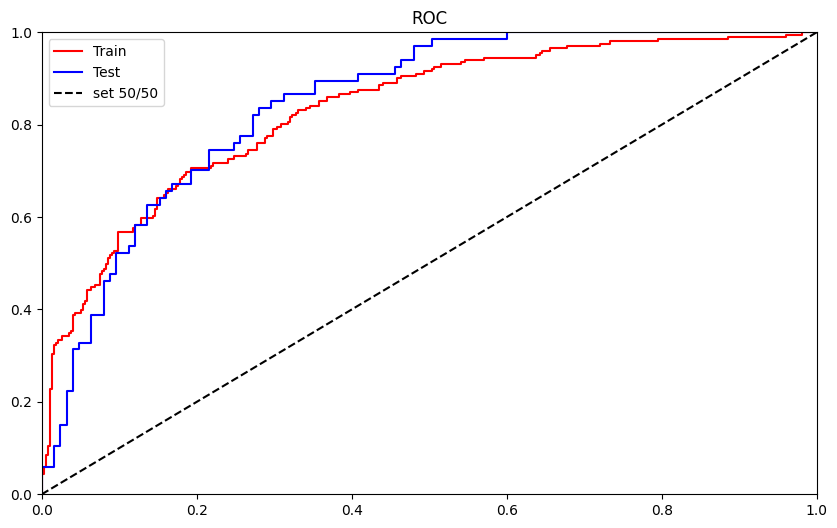

In [140]:
plot_roc(fpr_t, tpr_t, fpr, tpr)

In [ ]:
# y = TPR, X = FPR, im wynik przesuniety w gorny lewy róg tym lepszy model

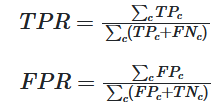

In [136]:
from IPython.display import Image
Image(filename='roc_curve.png') 

Analiza punktów odcięcia:

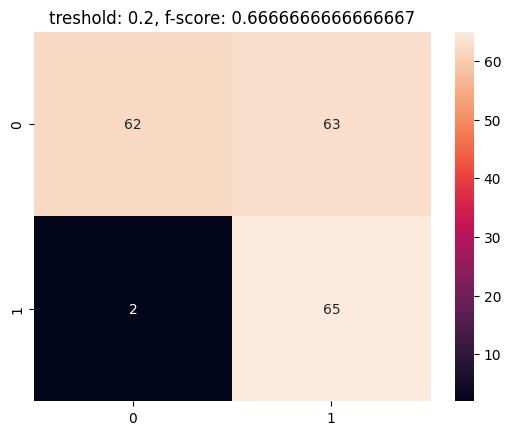

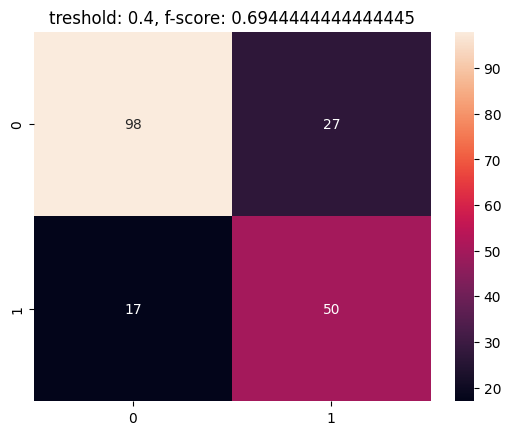

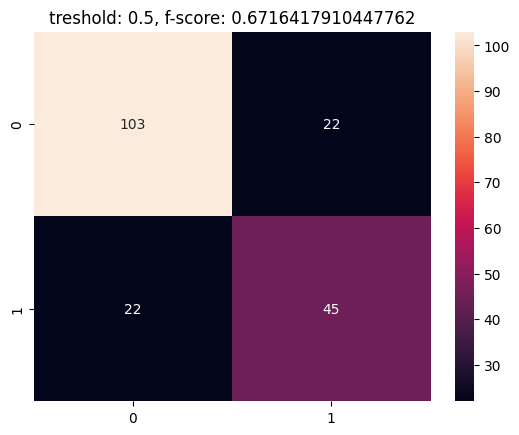

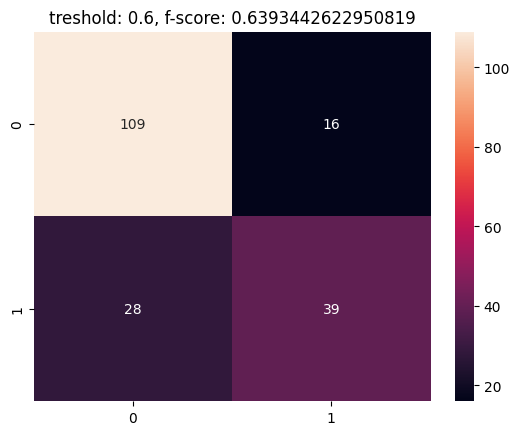

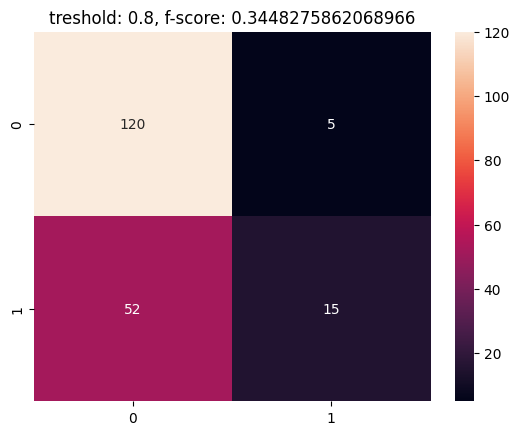

In [141]:
tresholds = [0.2, 0.4, 0.5, 0.6, 0.8]

for treshold in tresholds:
    y_pred = []
    for y in y_pred_proba[:,1]:
        if y > treshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    cm = confusion_matrix(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd')
    title = f'treshold: {treshold}, f-score: {f}'
    plt.title(title)
    plt.show()

Korzystając z wbudwanej funkcji sklearn roc_auc_score importowanej podobnie jak accuracy_score, precision_score, recall_score, f1_score z modułu sklearn.metrics oblicz pole pod krzywą ROC:

In [147]:
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
auc_test = roc_auc_score(y_test, y_pred_proba[:,1])

print(f'Pole pod krzywą ROC dla zestawu treningowego: {round(auc_train,2)}')
print(f'Pole pod krzywą ROC dla zestawu testowego: {round(auc_test,2)}')

Pole pod krzywą ROC dla zestawu treningowego: 0.83
Pole pod krzywą ROC dla zestawu testowego: 0.85


**Zadanie:** Przetestuj walidację krzyżową na analizowanym wcześniej zbiorze:

In [117]:
from sklearn.model_selection import cross_val_score

iteracja 1: trening: a,b,c,d, test: e <br>
iteracja 2: trening: a,b,c,e, test: d <br>
iteracja 3: trening: a,b,d,e, test: c <br>
iteracja 4: trening: a,c,d,e, test: b <br>
iteracja 5: trening: b,c,d,e, test: a <br>

In [148]:
from sklearn.model_selection import cross_val_score
X,y,classes = prepare_dataset('diabetes')

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=30)

model = LogisticRegression(random_state = 30,)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'precision_macro')
# scoring domyslnie jest accuracy, mozemy sami przypisac metode

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

In [155]:
scores

array([0.70694444, 0.67036898, 0.77505447, 0.72779304, 0.8331044 ])

# Regularyzacja, czyli jak przeciwdziałać overfittingowi. Czy to jest w ogóle problem? Sprawdźmy!

In [168]:
wine, wine_classes = load_dataset('wine', 'Class')

In [169]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [170]:
y = wine.pop('class') # pop przypisuje wyciętą kolumnę

In [171]:
X = wine

In [172]:
y.value_counts()

2    71
0    59
1    48
Name: class, dtype: int64

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=30, stratify=y, random_state=30)
model = LogisticRegression(random_state=30, max_iter=100)
model.fit(X_train, y_train)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=30)

In [178]:
# Additional cross validation
model = LogisticRegression(random_state = 30, max_iter = 1500)

scores_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro')
scores_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')
print(scores_precision)
print(scores_recall)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

[0.97435897 0.96296296 0.91538462 0.96296296 0.89469697]
[0.96666667 0.97222222 0.89722222 0.97222222 0.89772727]


C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
# w wieloetykietowej klasyfikacji, dla F score trzeba wskazań średnią
f_train = f1_score(y_train, y_pred_train, average='weighted')
f_test = f1_score(y_test, y_pred, average='weighted')

print(f'f-score na zbiorze treningowym: {f_train}')
print(f'f-score na zbiorze testowym: {f_test}')

f-score na zbiorze treningowym: 0.9730574324324324
f-score na zbiorze testowym: 0.8997452788757135


Regularyzacja:

In [179]:
# dodana regularyzacja = typ penalty, C =wartość penalty
model = LogisticRegression(random_state=30, max_iter=100, penalty = 'l2', C=0.1)
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

f_train = f1_score(y_train, y_pred_train, average='weighted')
f_test = f1_score(y_test, y_pred, average='weighted')

print(f'f-score na zbiorze treningowym: {f_train}')
print(f'f-score na zbiorze testowym: {f_test}')

f-score na zbiorze treningowym: 0.9594800986553564
f-score na zbiorze testowym: 0.933015873015873


C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Przetestujmy teraz jednocześnie wiele wartości parametru regularyzacji

In [180]:
import numpy as np

C_values = [10.0**x for x in np.arange(-3,2,1)]

print(C_values)

[0.001, 0.01, 0.1, 1.0, 10.0]


In [181]:
train_err = []
valid_err = []

for C_value in C_values:
    model = LogisticRegression(random_state=30, max_iter=100, penalty = 'l2', C=C_value)
    model.fit(X_train, y_train)
    
    train_err.append(model.score(X_train, y_train)) # od razu liczy accuracy bez predykowania
    valid_err.append(model.score(X_test, y_test))

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

In [182]:
train_err

[0.8108108108108109,
 0.9459459459459459,
 0.9594594594594594,
 0.972972972972973,
 0.9797297297297297]

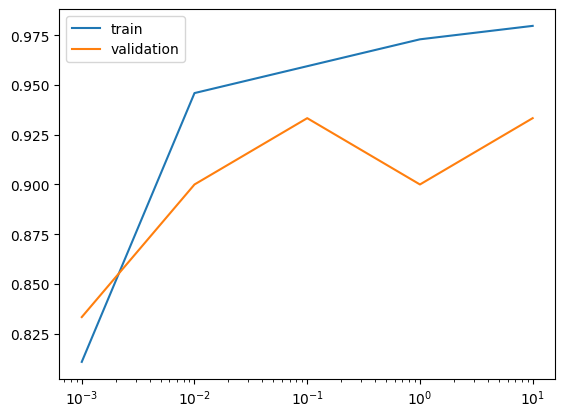

In [183]:
plt.semilogx(C_values, train_err, C_values, valid_err)
plt.legend(('train', 'validation'))
plt.show()
# im mniejsza waga tym bardziej wplywa na regulazryzacje

Skorzystajmy teraz z metody Grid Search. Regularyzacja l1 udostępnia selekcję cech, o możemy zobaczyć tu:

In [121]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV zapewnia w sobie cross validacje i mozemy podac słownik argumentów do prawdzenia
# RandomizedSearchCV - przeszukuje na podstawie randomowych parametor
# optiuna - sama adobiera parametry, szybsza od RandomizedSearchCV

In [184]:
lr = LogisticRegression(solver ='liblinear', random_state=30)
# nie kazdy solver obsluguje kazda regularyzacje
params = {'C':[10.0**x for x in np.arange(-3,2,1)],
         'penalty': ['l1', 'l2'],
         'max_iter': [100, 300, 500]}
# defaoltowo wbudowany scoring jako accuracy

In [185]:
searcher = GridSearchCV(lr, param_grid=params, cv = 3, n_jobs=-1)
searcher.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=30, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 300, 500], 'penalty': ['l1', 'l2']})

In [188]:
best_lr = searcher.best_estimator_
best_params = searcher.best_params_
coefs = best_lr.coef_

Sprawdźmy też jakie wartości współczynników wyznaczyła regresja rozwiązując naszy układ równań:

In [189]:
print(best_lr, best_params, coefs)

LogisticRegression(C=0.1, random_state=30, solver='liblinear') {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'} [[-1.41163965e-01  1.39206235e-01  1.31606370e-01 -4.41857367e-01
  -4.27735386e-02  1.90438260e-01  4.47679216e-01 -2.96643449e-02
   1.04343639e-01 -1.08606529e-01 -1.23387479e-02  2.98661852e-01
   1.51025532e-02]
 [-1.52568737e-01  3.74196920e-01  1.46272865e-02  6.24525872e-02
   3.72547325e-03 -3.28771946e-01 -7.49339889e-01  3.59377696e-05
  -3.20350039e-01  7.42968876e-01 -1.69847206e-01 -5.40153209e-01
  -2.24026805e-03]
 [ 2.73268528e-01 -4.87516258e-01 -1.31775982e-01  1.79426810e-01
   2.22246921e-02  1.39446332e-01  2.44629328e-01  5.66099083e-02
   1.33228642e-01 -9.40003948e-01  2.04549988e-01  2.65911888e-01
  -9.00409187e-03]]


# Granice decyzyjne na sztucznie wygenerowanym zbiorze:

Zaczniemy od wygenerowania sztucznego zbioru do klasyfikacji, składającego się z dwóch zbiorów punktów z rozkładu normalnego.

In [310]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))

train_labels = np.hstack((np.zeros(100), np.ones(100)))


# np.vstack - połaczenie tablic wertykalne
# np.hstack - połączenie tablic horyzontalne

In [311]:
train_data[:10] # liczba cech:2 - czyli 2-wymiarowa

array([[ 0.43182092,  1.96116858],
       [-0.2589812 , -1.3206946 ],
       [ 1.7578515 , -0.02067322],
       [ 0.85700427, -0.23215878],
       [-1.04759729,  1.58834962],
       [ 2.2945076 , -0.04018866],
       [-0.58428409,  0.2925964 ],
       [ 0.28619476, -0.40972442],
       [ 0.91254616, -0.7424557 ],
       [-0.7714561 , -0.9912993 ]])

In [312]:
train_data.shape

(200, 2)

In [313]:
train_labels.shape

(200,)

In [314]:
train_labels[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Wyświetlimy je w postaci wykresu punktowego, wraz z linią dokładnie pomiędzy środkami obu rozkładów:

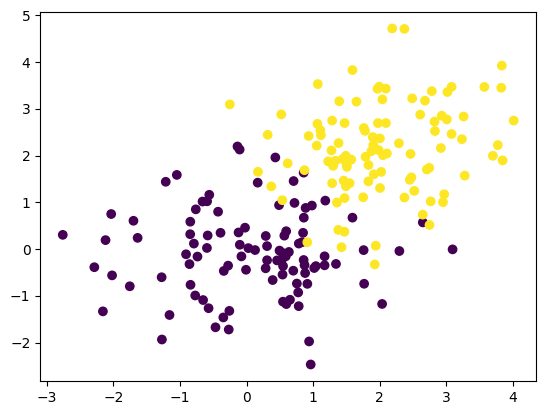

In [315]:
fig, ax = plt.subplots()

ax.scatter(train_data[:,0], train_data[:,1], c =train_labels)
#(x, y, colors - jesli sa dwie klasy - to będą 2 kolory)

Na tak utworzonym zbiorze wytrenujemy model regresji logistycznej

In [316]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_data, train_labels)

LogisticRegression()

Stwórzmy zbiór testowy poprzez rozszerzenie zakresu zbioru treningowego.

In [317]:
print(train_data[:,0].min(), train_data[:,0].max())
print(train_data[:,1].min(), train_data[:,1].max())

-2.7605469311717483 4.011151165077219
-2.467376576275682 4.720947353064128


In [318]:
x_min, x_max = train_data[:,0].min() -1, train_data[:,0].max() +1
y_min, y_max = train_data[:,1].min() -1, train_data[:,1].max() +1

In [319]:
print(x_min, x_max)
print(y_min, y_max)

-3.7605469311717483 5.011151165077219
-3.467376576275682 5.720947353064128


In [320]:
a = x_max - x_min
b = y_max - y_min
print(a, b)

8.771698096248969 9.18832392933981


In [321]:
print(f'value x: {a/0.01}, value y:{b/0.01}')

value x: 877.1698096248969, value y:918.8323929339809


Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

In [322]:
xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) #(od, do, co 0.01)

In [339]:
g, h = 1,3
t, p = 2,5

In [340]:
e, f = np.meshgrid(np.arange(g, h, 1), np.arange(t, p, 1)) #(od, do, co 0.01), (wartosc X, wartosc y)

In [341]:
e

array([[1, 2],
       [1, 2],
       [1, 2]])

In [342]:
f

array([[2, 2],
       [3, 3],
       [4, 4]])

In [283]:
print(xs.shape)
print(ys.shape)

(834, 907)
(834, 907)


In [343]:
y_pred = model.predict(np.column_stack((xs.flatten(),
                                       ys.flatten())))

In [350]:
print(y_pred.shape)

(806882,)


In [345]:
y_pred_matrix = y_pred.reshape(xs.shape)

Dokonujemy predykcji oraz wyświetlamy wszystkie punkty pcolormeshem, żeby zobaczyć w jaki sposób regresja logistyczna dokonała podziału przestrzeni.

In [346]:
for x,y, pred in zip(xs, ys, y_pred_matrix):
    print(x, y, pred)
    
    break

[-3.76054693e+00 -3.75054693e+00 -3.74054693e+00 -3.73054693e+00
 -3.72054693e+00 -3.71054693e+00 -3.70054693e+00 -3.69054693e+00
 -3.68054693e+00 -3.67054693e+00 -3.66054693e+00 -3.65054693e+00
 -3.64054693e+00 -3.63054693e+00 -3.62054693e+00 -3.61054693e+00
 -3.60054693e+00 -3.59054693e+00 -3.58054693e+00 -3.57054693e+00
 -3.56054693e+00 -3.55054693e+00 -3.54054693e+00 -3.53054693e+00
 -3.52054693e+00 -3.51054693e+00 -3.50054693e+00 -3.49054693e+00
 -3.48054693e+00 -3.47054693e+00 -3.46054693e+00 -3.45054693e+00
 -3.44054693e+00 -3.43054693e+00 -3.42054693e+00 -3.41054693e+00
 -3.40054693e+00 -3.39054693e+00 -3.38054693e+00 -3.37054693e+00
 -3.36054693e+00 -3.35054693e+00 -3.34054693e+00 -3.33054693e+00
 -3.32054693e+00 -3.31054693e+00 -3.30054693e+00 -3.29054693e+00
 -3.28054693e+00 -3.27054693e+00 -3.26054693e+00 -3.25054693e+00
 -3.24054693e+00 -3.23054693e+00 -3.22054693e+00 -3.21054693e+00
 -3.20054693e+00 -3.19054693e+00 -3.18054693e+00 -3.17054693e+00
 -3.16054693e+00 -3.15054

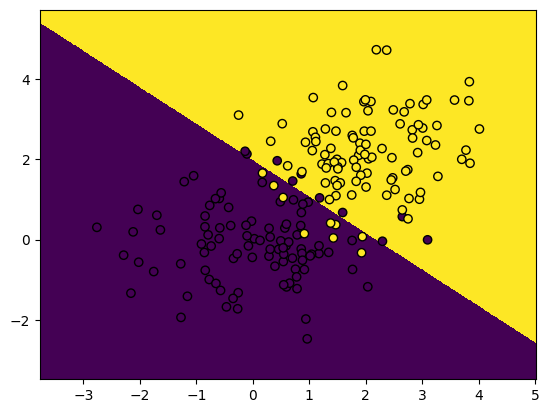

In [347]:
fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, y_pred_matrix)
ax.scatter(train_data[:,0], train_data[:,1], c=train_labels, edgecolors = 'k')
plt.show()

Zwróćmy uwagę na fakt, że jest tutaj linia prosta.